Processing Downloads/audio\birds_1.wav
MFCCs shape: (20, 139)
Spectral Centroid shape: (1, 139)
Processing Downloads/audio\birds_2.wav
MFCCs shape: (20, 273)
Spectral Centroid shape: (1, 273)
Processing Downloads/audio\birds_3.wav
MFCCs shape: (20, 119)
Spectral Centroid shape: (1, 119)
Processing Downloads/audio\cat_1.wav
MFCCs shape: (20, 57)
Spectral Centroid shape: (1, 57)
Processing Downloads/audio\cat_2.wav
MFCCs shape: (20, 513)
Spectral Centroid shape: (1, 513)
Processing Downloads/audio\cat_3.wav
MFCCs shape: (20, 517)
Spectral Centroid shape: (1, 517)
Processing Downloads/audio\cat_4.wav
MFCCs shape: (20, 112)
Spectral Centroid shape: (1, 112)
Processing Downloads/audio\cat_5.wav
MFCCs shape: (20, 37)
Spectral Centroid shape: (1, 37)
Processing Downloads/audio\cat_6.wav
MFCCs shape: (20, 130)
Spectral Centroid shape: (1, 130)
Processing Downloads/audio\dog_barking_1.wav
MFCCs shape: (20, 500)
Spectral Centroid shape: (1, 500)
Processing Downloads/audio\dog_barking_2.wav
MFCCs

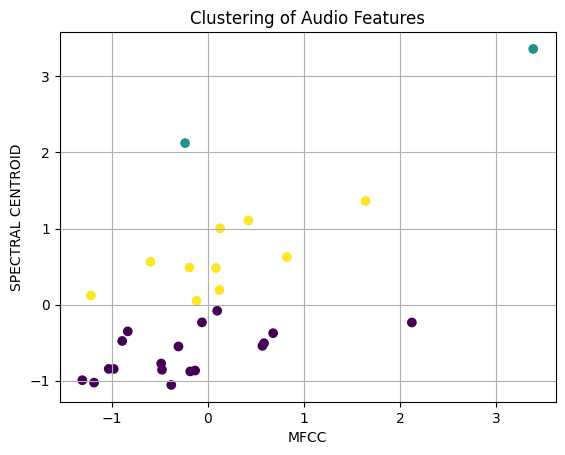

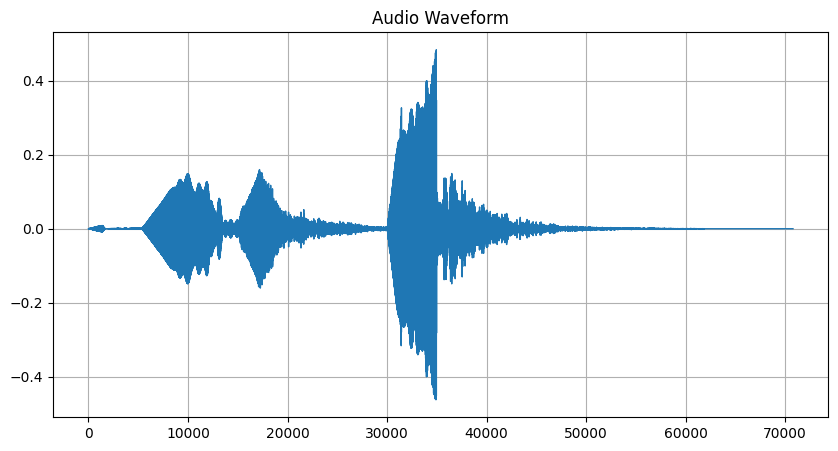

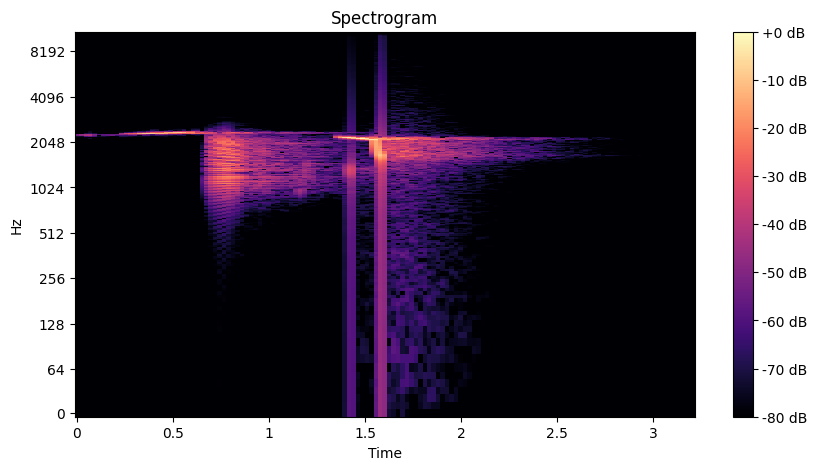

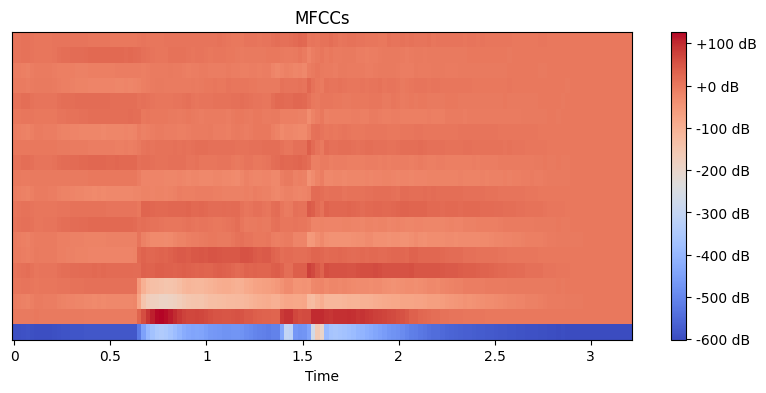

            mfcc     spectral        mfcc_t    spectral_t    cluster
count  30.000000    30.000000  3.000000e+01  3.000000e+01  30.000000
mean   17.094767  2787.904569 -6.383782e-17  2.109424e-16   0.733333
std    24.742958  1635.762543  1.017095e+00  1.017095e+00   0.944433
min   -14.711632  1091.735845 -1.307448e+00 -1.054655e+00   0.000000
25%     3.218245  1458.801966 -5.704147e-01 -8.264182e-01   0.000000
50%    13.216367  2317.087807 -1.594273e-01 -2.927476e-01   0.000000
75%    25.530296  3570.882757  3.467547e-01  4.868454e-01   2.000000
max    99.409142  8192.071909  3.383652e+00  3.360239e+00   2.000000


In [2]:
import pandas as pd  # for data manipulation and analysis
import librosa  # for audio processing
from sklearn.cluster import KMeans  # for clustering
from sklearn.preprocessing import StandardScaler  # for feature scaling
from matplotlib import pyplot as plt  # for visualization
from glob import glob  # for file pattern matching
import numpy as np  # for numerical operations
import warnings  # for handling warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Retrieve a list of all .wav files in the 'audio' directory
audio_files =glob('Downloads/audio/*.wav')

# Lists to store extracted features
mfccs = []
spectral_centroid = []
# Process each audio file to extract features
for audio_file in audio_files:
    try:
        animal, sr = librosa.load(audio_file)
        
        # Calculate MFCC and Spectral Centroid
        mfccs_anim = librosa.feature.mfcc(y=animal, sr=sr, n_mfcc=20)
        spectral_centroid_anims = librosa.feature.spectral_centroid(y=animal, sr=sr)

        # Print shapes for debugging
        print(f"Processing {audio_file}")
        print(f"MFCCs shape: {mfccs_anim.shape}")
        print(f"Spectral Centroid shape: {spectral_centroid_anims.shape}")

        # Append feature values to lists
        mfccs.append(np.mean(mfccs_anim[9]))  # Mean of the 10th MFCC
        spectral_centroid.append(np.mean(spectral_centroid_anims))  # Mean spectral centroid

    except Exception as e:
        print(f"Error processing file {audio_file}: {e}")

# Number of audio files
l = len(audio_files)

# Iterate over each audio file
for i in range(l):
    # Load the audio file
    animal, sr = librosa.load(audio_files[i])
    
    # Extract MFCCs
    mfccs_anim = librosa.feature.mfcc(y=animal, sr=sr, n_mfcc=20)
    # Extract spectral centroid
    spectral_centroids_anims = librosa.feature.spectral_centroid(y=animal, sr=sr)
    
    # Store the 10th MFCC and the maximum spectral centroid
    mfccs.append(max(mfccs_anim[9]))
    spectral_centroid.append(max(max(spectral_centroids_anims)))

# Create a DataFrame to store the features
df = pd.DataFrame()
df['mfcc'] = mfccs
df['spectral'] = spectral_centroid

# Standardize the features
scaler = StandardScaler()
df[['mfcc_t', 'spectral_t']] = scaler.fit_transform(df[['mfcc', 'spectral']])
# Apply K-means clustering
KM = KMeans(n_clusters=3)
y_predict = KM.fit_predict(df[['mfcc', 'spectral']])
df['cluster'] = y_predict
# Print the DataFrame
print(df)
# Plot the clustered data
plt.scatter(df['mfcc_t'], df['spectral_t'], c=df['cluster'])
plt.grid()
plt.xlabel('MFCC')
plt.ylabel('SPECTRAL CENTROID')
plt.title('Clustering of Audio Features')
plt.show()
# Load the first audio file for visualization
y, sr = librosa.load(audio_files[0])
# Plot the waveform of the audio file
plt.figure(figsize=(10, 5))
pd.Series(y).plot(lw=1, title='Audio Waveform')
plt.grid()
plt.show()
# Compute and plot the spectrogram
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()
# Compute and plot the MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCCs')
plt.show()
# Print summary statistics of the DataFrame
print(df.describe())
